In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords

Leemos la info georeferenciada de los mercados. Primero como un dataframe y luego como un geodataframe.

In [2]:
index_delegacion = 7

delegaciones= {
    0: "MILPA ALTA",
    1: "BENITO JUÁREZ",
    2: "GUSTAVO A. MADERO",
    3: "COYOACÁN",
    4: "MIGUEL HIDALGO",
    5: "MAGDALENA CONTRERAS",
    6: "TLÁHUAC",
    7: "AZCAPOTZALCO",
    8: "IZTACALCO",
    9: "ÁLVARO OBREGÓN",
    10: "XOCHIMILCO",
    11: "VENUSTIANO CARRANZA",
    12: "TLALPAN",
    13: "CUAJIMALPA",
    14: "CUAUHTÉMOC",
    15: "IZTAPALAPA"
}

df = pd.read_excel('MercadosFull.xlsx')
df = df[df.DELEGACION.isin([delegaciones[index_delegacion]])]
df

,DELEGACION,MERCADO,Coord_Y,Coord_X,SUPERF_M2,long,lat
0,AZCAPOTZALCO,AZCAPOTZALCO,2.154268e+06,480539.526740,9346,-99.185439,19.482872
1,AZCAPOTZALCO,CLAVERIA,2.152290e+06,480987.333240,2063,-99.181152,19.465003
2,AZCAPOTZALCO,ARENAL,2.152428e+06,484181.954160,3129,-99.150715,19.466271
3,AZCAPOTZALCO,PROHOGAR,2.153488e+06,483884.412980,7167,-99.153559,19.475848
4,AZCAPOTZALCO,SANTA LUCIA,2.153555e+06,479388.534620,3116,-99.196399,19.476417
5,AZCAPOTZALCO,COSMOPOLITA,2.153419e+06,483019.896030,2848,-99.161796,19.475223
6,AZCAPOTZALCO,VICTORIA DE LAS DEMOCRACIAS,2.152575e+06,482885.706150,2954,-99.163067,19.467591
7,AZCAPOTZALCO,OBRERO POPULAR,2.152094e+06,481783.110290,1856,-99.173568,19.463233
8,AZCAPOTZALCO,NUEVA SANTA MARIA,2.152222e+06,482235.385640,3740,-99.169260,19.464396
9,AZCAPOTZALCO,BENITO JUAREZ,2.153476e+06,481445.000720,2317,-99.176803,19.475726


In [3]:
mercados = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))
mercados.head()

,DELEGACION,MERCADO,Coord_Y,Coord_X,SUPERF_M2,long,lat,geometry
0,AZCAPOTZALCO,AZCAPOTZALCO,2.154268e+06,480539.52674,9346,-99.185439,19.482872,POINT (-99.18544 19.48287)
1,AZCAPOTZALCO,CLAVERIA,2.152290e+06,480987.33324,2063,-99.181152,19.465003,POINT (-99.18115 19.46500)
2,AZCAPOTZALCO,ARENAL,2.152428e+06,484181.95416,3129,-99.150715,19.466271,POINT (-99.15072 19.46627)
3,AZCAPOTZALCO,PROHOGAR,2.153488e+06,483884.41298,7167,-99.153559,19.475848,POINT (-99.15356 19.47585)
4,AZCAPOTZALCO,SANTA LUCIA,2.153555e+06,479388.53462,3116,-99.196399,19.476417,POINT (-99.19640 19.47642)


Convertimos estos puntos en un sistema de coordenadas de referencia(CRS)

WGS84 Latitude/Longitude: "EPSG:4326"

In [4]:
mercados.crs = "EPSG:4326"

Importamos ahora los polígonos correspondientes a las alcaldías de la CDMX

In [5]:
alcaldias = gpd.read_file("alcaldias_cdmx.shp")

Tomamos ahora el polígono correspondiente a la alcaldía Venustiano Carranza

In [6]:
alcaldia = alcaldias.drop([i for i in range(16) if i != index_delegacion],axis=0)

Vamos a graficar estos datos.

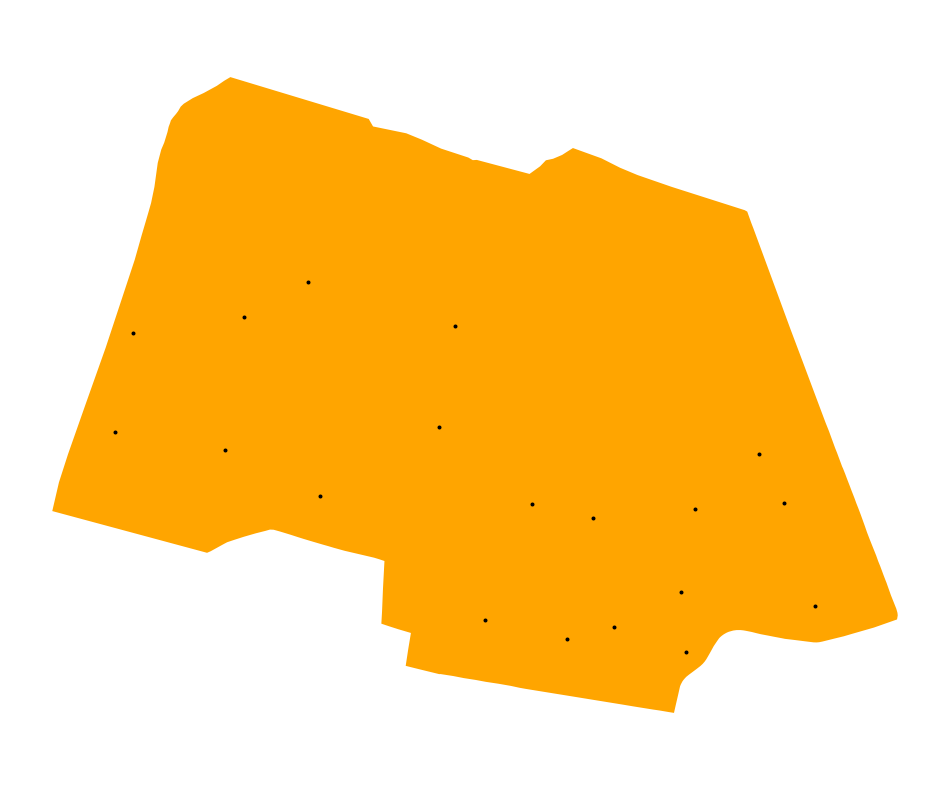

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
alcaldia.plot(ax=ax, color="orange")
mercados.plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
plt.axis('equal')
plt.show()

Ajustamos la información al sistema de coordenadas de referencia(CRS)

In [8]:
alcaldia = alcaldia.to_crs(epsg=3395)
gdf_proj = mercados.to_crs(alcaldia.crs)

Convertimos estos datos al formato que puede ser utilizado por la biblioteca Geovoronoi.

In [9]:
alcaldia_shape = cascaded_union(alcaldia.geometry)
coords = points_to_coords(gdf_proj.geometry)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_185268\506581455.py:1: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  alcaldia_shape = cascaded_union(alcaldia.geometry)


Calculamos ahora las regiones de Voronoi

In [10]:
pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, alcaldia_shape)


Graficamos el diagrama

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


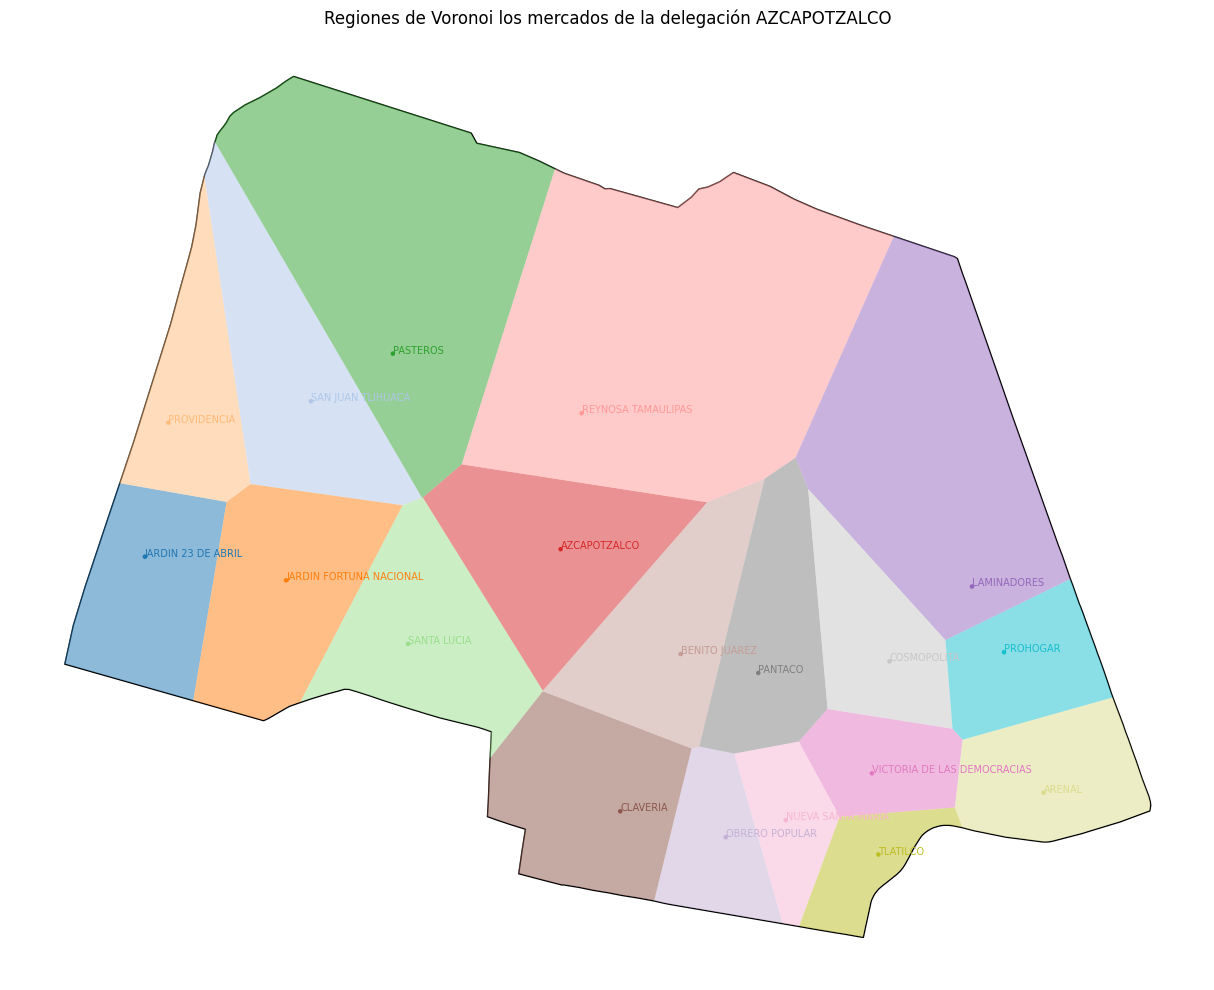

In [11]:
fig, ax = subplot_for_map(figsize=(14.5,10))
plot_voronoi_polys_with_points_in_area(ax, alcaldia_shape, pts, coords,  poly_to_pt_assignments, point_labels=gdf_proj.MERCADO.tolist())
ax.set_title(f'Regiones de Voronoi los mercados de la delegación {delegaciones[index_delegacion]}')
plt.tight_layout()
plt.show()